# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import scipy.stats as stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.head(10)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013
5,WESTERN MISSOURI MEDICAL CENTER,260097,MO,READM-30-HIP-KNEE-HRRP,141,NaN,1.5189,8.1,5.3,19.0,07/01/2010,06/30/2013
6,SAINT AGNES HOSPITAL,210011,MD,READM-30-HIP-KNEE-HRRP,390,NaN,1.5079,7.8,5.2,38.0,07/01/2010,06/30/2013
7,MERCY HOSPITAL JEFFERSON,260023,MO,READM-30-HIP-KNEE-HRRP,178,NaN,1.5019,9.2,6.1,24.0,07/01/2010,06/30/2013
8,ONSLOW MEMORIAL HOSPITAL,340042,NC,READM-30-HIP-KNEE-HRRP,98,NaN,1.4953,7.9,5.3,15.0,07/01/2010,06/30/2013
9,FAUQUIER HOSPITAL,490023,VA,READM-30-HIP-KNEE-HRRP,256,NaN,1.4844,7.4,5.0,26.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:,'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

In [5]:
clean_hospital_read_df['Number of Discharges'][81]

142

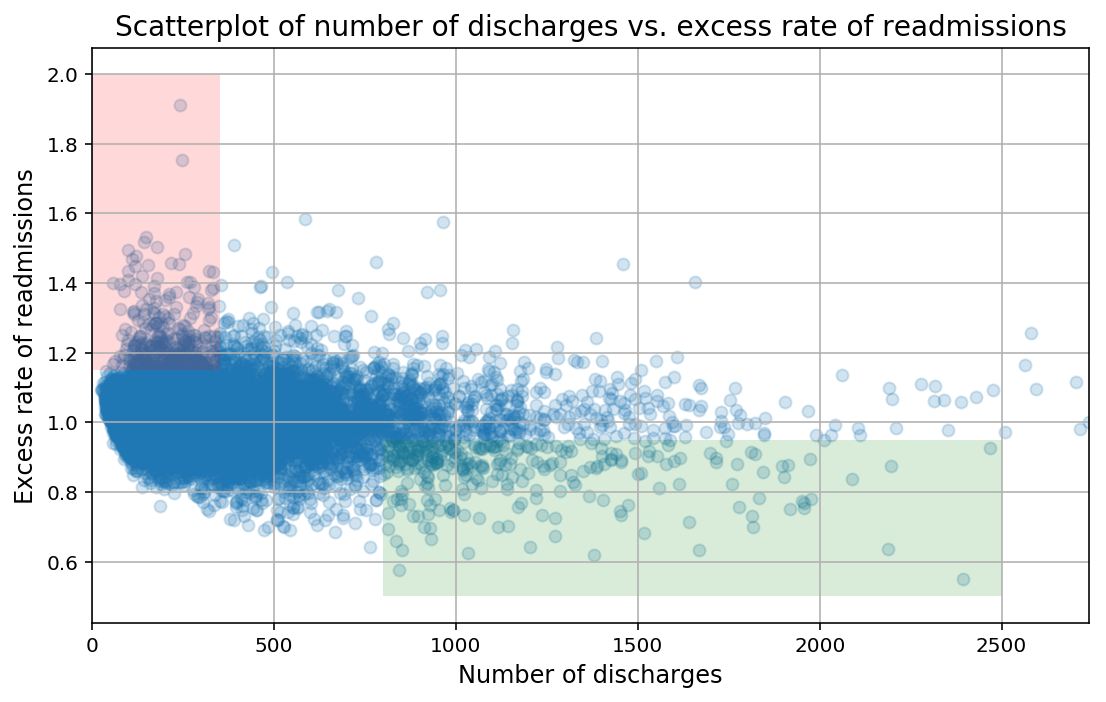

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81 : -3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81 : -3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [7]:
# Your turn

In [8]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


## Do you agree with the above analysis and recommendations? Why or why not?

I do believe that the number of discharges can tell more about the number of readmissions such as with lower number of discharges, there is a greater incidence of excess rate of readmissions.

# Hypothesis Test Setup



## Null Hypothesis
Excess readmission rate with less than 300 discharges = Excess readmission rate with all the hospitals. 

## Alternative Hypothesis
Excess readmission rate with less than 300 discharges ≠ Excess readmission rate with all the hospitals. 

In [9]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates


## Z score and P-Value for the hopsitals with less than 300 discharges

First we will find the mean of total population. Then, we find the mean of hospitals with less than 300 discharges.From there , we find the Z- Value and P- Value.

In [10]:
clean_hospital_read_df = clean_hospital_read_df[81:-3]
lower_discharges_hopsitals = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] <= 300]
population_mean  = np.mean(clean_hospital_read_df['Excess Readmission Ratio'])
sample_mean = np.mean(lower_discharges_hopsitals['Excess Readmission Ratio'])
population_std = np.std(clean_hospital_read_df['Excess Readmission Ratio'])

Z_score = (sample_mean - population_mean) / (population_std/np.sqrt(len(lower_discharges_hopsitals)))
P = stats.norm.cdf(Z_score)

In [11]:
print(Z_score)
print(P)

5.72526187043
0.999999994836


Since the P value is significantly low and we reject the Null Hypothesis that 

##  Statistical significance for  α  = .01

In [12]:
alpha = stats.norm.ppf(0.99)
print("Alpha 0.1 Z-Score -> " , alpha)

Alpha 0.1 Z-Score ->  2.32634787404


 As we know the Z score from above is 5.725 and for alpha 0.1 it is still farther. We would reject the Null Hypothesis. We can make conclusion based on these tests that Excess readmission ratio is depending on the number of discharges in this dataset. 

In [13]:
print("Difference between sample and population " , sample_mean- population_mean)

Difference between sample and population  0.006719634206614256


As we can see the difference is some significant here between sample and population mean. Our data standard deviation is 0.09 and the difference of mean is 0.006 which is close to one standard deviation.

In [14]:
five = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] <= 500]
five['Number of Discharges'] = 500
ten =  clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] <=1000) & (clean_hospital_read_df['Number of Discharges'] > 500)]
ten['Number of Discharges'] = 1000
fifteen =  clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] <=1500) & (clean_hospital_read_df['Number of Discharges'] > 1000)]
fifteen['Number of Discharges'] = 1500
twenty =  clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] <=2000) & (clean_hospital_read_df['Number of Discharges'] > 1500)]
twenty['Number of Discharges'] = 2000
twe_five =  clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] <=2500) & (clean_hospital_read_df['Number of Discharges'] > 2000)]
twe_five['Number of Discharges'] = 2500
all_dfs = [five , ten , fifteen, twenty , twe_five]
final_dfs = pd.concat(all_dfs)


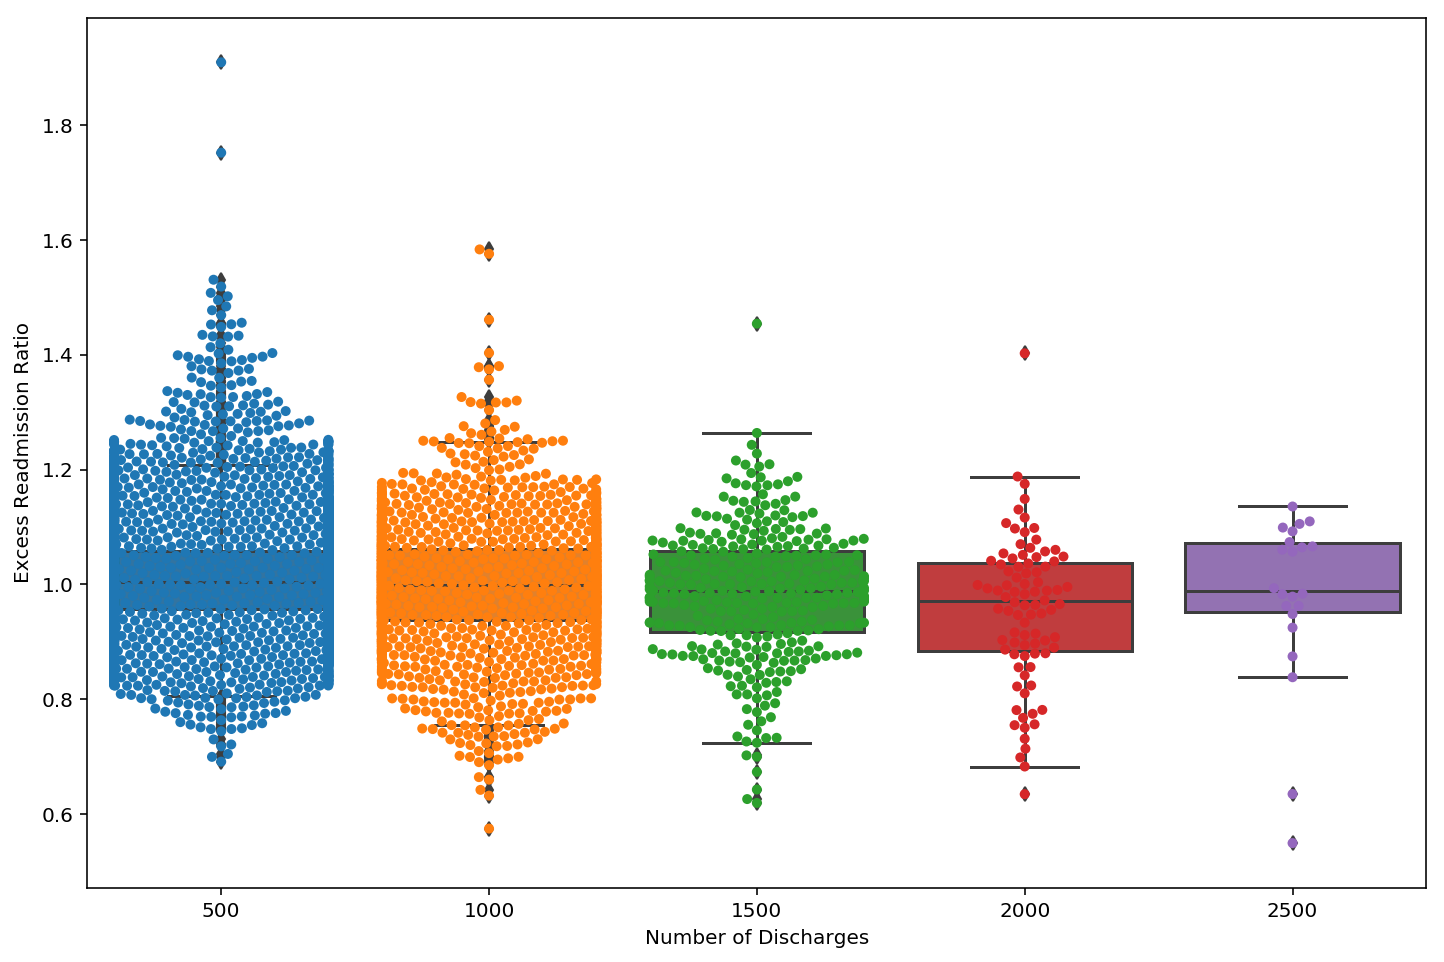

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Number of Discharges' , y='Excess Readmission Ratio', data = final_dfs)
sns.swarmplot(x='Number of Discharges' , y='Excess Readmission Ratio', data = final_dfs)


As we can see that the lower number of discharges has very few numbers of higher readmission rate. In other words, there are very few hospitals that has lower number of discharges with higher number of readmissions. Most of the hospitals have the same median in this dataset. 

Besides our statistical test, we have to look at the bigger picture such as maybe smaller hospitals do not have all the facilities to keep their pateints admit. Smaller hospitals probably do not provide complete treatment as compare to larger hospitals. Also, we have to look at demographic population and what kind of people live in the area. We have to look at the lifestyle of population, diet, stress-level etc and that is also a big factor to consider before we reject the Null Hypothesis. 